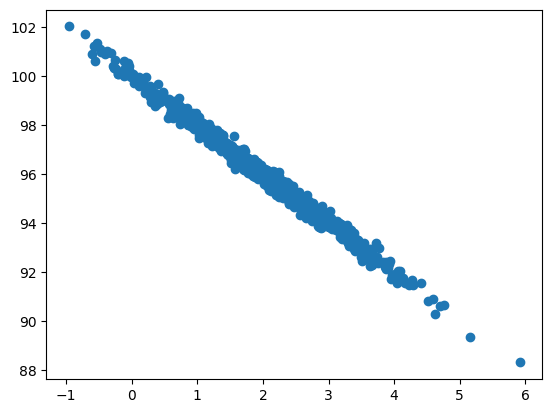

In [ ]:
%matplotlib inline
import numpy as np
from pylab import *


pageSpeeds = np.random.normal(2.0, 1.0, 1000) # mean, standard deviation, size
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 2

scatter(pageSpeeds, purchaseAmount)

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)

In [ ]:
r_value ** 2

0.990955735400804

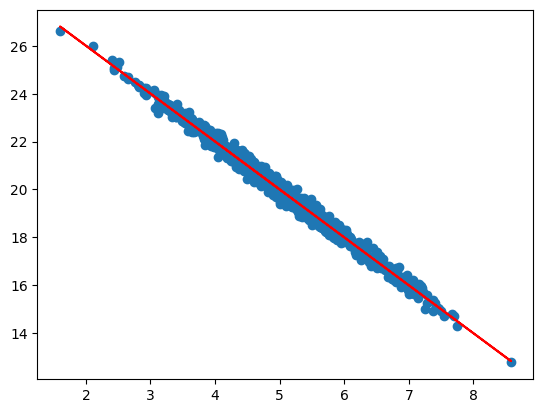

In [ ]:
import matplotlib.pyplot as plt

def predict(x):
  return slope * x + intercept

fitLine = predict(pageSpeeds)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')

**Your Turn:**

Try increasing the random variation in the test data, and see what effect it has on the r-squared error value. Explain you observation and interpretation


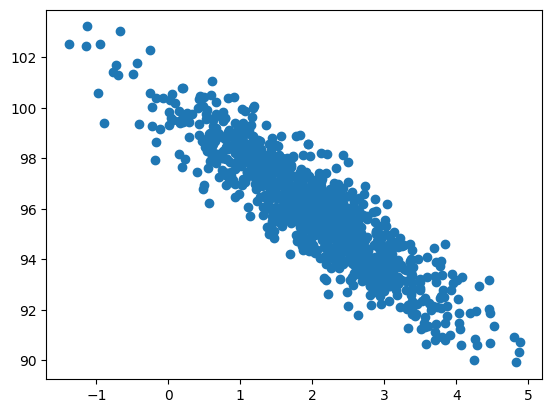

In [ ]:
%matplotlib inline
import numpy as np
from pylab import *

pageSpeeds = np.random.normal(2.0, 1.0, 1000) # mean, standard deviation, size
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.5, 1000)) * 2

scatter(pageSpeeds, purchaseAmount)

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)

r_value ** 2

0.9995840761665477

When the standard deviation is closer to zero, the more the points get close to the mean but when it is large, the more spread the points get and it moves awway from the mean.  

I tried increasing the standard deviation of the purchaseAmount, the scatterplots on the data were more dispersed and the r-value decreased. As for the pageSpeeds, the plots were forming closely into a perfect line and the r-value increased.


Polynomial

What if your data doesn't look linear at all? let's look at some more realistic-looking page speed / purchase data:

In [ ]:
%matplotlib inline
import numpy as np
from pylab import *

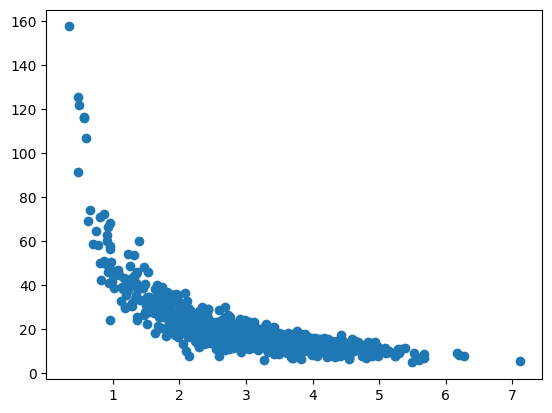

In [ ]:
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds
scatter(pageSpeeds, purchaseAmount)

numpy has a handy polyfit function we can use, to let us contruct an nth-degree polynomial model of our data that minimizes squared error. Lets try it with a 4th degree polynomial:


In [ ]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))
print(p4)

        4         3         2
0.5401 x - 8.856 x + 52.25 x - 135.3 x + 147.6


In [ ]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

#p4 = np.poly1d(np.polyfit(x, y, 4)) #(x, y, degree)

# Your Turn
# p4 = np.poly1d(np.polyfit(x,y,1))

p4 = np.poly1d(np.polyfit(x,y,8))
print(p4)

         8          7         6         5         4         3         2
0.02075 x - 0.6366 x + 8.215 x - 58.07 x + 245.3 x - 633.6 x + 981.3 x - 852.5 x + 357.9


we'll visualize our orginal scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:


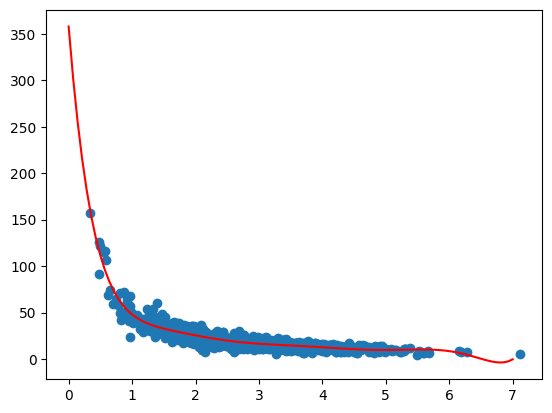

In [ ]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y, p4(x))
print(r2)

0.8293766396303073


**Your Turn:**

Try different polynomial orders. Can you get a better fit with higher orders?. Do you start to see overfitting, even though the r-squared score looks good for this particula dataset. Try p4 = np.poly1d(np.polyfit(x,y,1)) and np.poly1d(np.polyfit(x,y,8)) and third degree
np.poly1d(np.polyfit(x,y,8)). Explain if theres overfitting explain your interpretation and observation.

The first given syntax for the degree of the polynomial displays a straight line that doesn't fit the plots. It means that it is underfitting, because the line is too simple compared to the complex points of the data.

While the second and third degrees–which are of the same values–best fit the scatterplot. It displayed almost a perfect, curved line that shapes the plots, making it overfitting.



Multiple Regression

In [ ]:
import pandas as pd
df = pd.read_excel('/content/cars(4)(2).xls')


                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


<ipython-input-136-52f00b9c91d5>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean()


<Axes: xlabel='Mileage'>

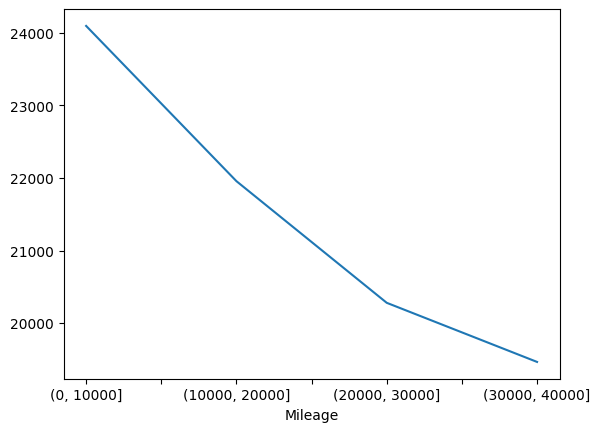

In [ ]:
%matplotlib inline
import numpy as np

df1 = df[['Mileage', 'Price']]
bins = np.arange(0,50000,10000)
groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean()
print(groups.head())
groups['Price'].plot.line()

we can use pandas to split up this matrix into the feature vectors were insterested in, and the value were trying to predict.

Note how we are avoiding the make and model; regressions don't work well with ordinal values, unless you can convert them into some numerical order that makes sense somehow.

Lets scale our feature data into the same range so we easily compare the coefficients we end up with.

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Liter', 'Doors']]
y = df['Price']

X[['Mileage', 'Cylinder', 'Liter', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Liter', 'Doors']].values)

print(X)

est = sm.OLS(y, X).fit()

est.summary()

      Mileage  Cylinder     Liter     Doors
0   -1.417485   0.52741  0.056736  0.556279
1   -1.305902   0.52741  0.056736  0.556279
2   -0.810128   0.52741  0.056736  0.556279
3   -0.426058   0.52741  0.056736  0.556279
4    0.000008   0.52741  0.056736  0.556279
..        ...       ...       ...       ...
799 -0.439853   0.52741 -0.033772  0.556279
800 -0.089966   0.52741 -0.033772  0.556279
801  0.079605   0.52741 -0.033772  0.556279
802  0.750446   0.52741 -0.033772  0.556279
803  1.932565   0.52741 -0.033772  0.556279

[804 rows x 4 columns]


<ipython-input-137-8b2fe269e4fa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Liter', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Liter', 'Doors']].values)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.059
Method:                 Least Squares   F-statistic:                              13.57
Date:                Fri, 20 Sep 2024   Prob (F-statistic):                    1.04e-10
Time:                        10:11:56   Log-Likelihood:                         -9207.1
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     800   BIC:                                  1.844e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1275.2178    805.476     -1.583      0.114   -2856.315     305.879
Cylinder    5251.9235   2915.177      1.802      0.072    -470.375     1.1e+04
Liter        350.1174   2923.691      0.120      0.905   -5388.894    6089.128
Doors      -1376.1100    839.085     -1.640      0.101   -3023.178     270.958
==============================================================================
Omnibus:                      160.986   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.567
Skew:                           1.291   Prob(JB):                     2.15e-58
Kurtosis:                       4.125   Cond. No.                         7.13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y.groupby(df.Doors).mean()

,Price
Doors,
2,23807.135520
4,20580.670749


In [ ]:
scaled = scale.transform([[45000, 8, 4, 8]])
print(scaled)
predicted = est.predict(scaled[0])
print(predicted)

[[3.07256589 1.96971667 0.87130875 5.2641554 ]]
[-512.38572087]


**Your Turn:**

Mess around with the sample input data, and see if you can create a measurable influence of number of doors on price. Have some fun with it- Why stop at 4 doors? say, cars that have 5,7,8 door 10 if possible

I have observed that there is a positive correlation between the number of doors and the predicted price value. If you increase the number of doors, the predicted price will go up as well. Although, when I tried 8 or 10, it displayed a negative prediction.